<a href="https://colab.research.google.com/github/Yashithi98/Machine-Learning/blob/main/Multivariate_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MULTIVARIATE LINEAR REGRESSION**


Dataset : https://archive.ics.uci.edu/ml/machine-learning-databases/00265/


# Importing Libraries

The libraries and packages facilitating the computation of the linear regression model is imported as follows :

In [ ]:
import urllib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import HTML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

# Importing the Dataset from UCI Machine Learning Repository

This is a data set of Physicochemical Properties of Protein Tertiary Structure. The data set is taken from CASP 5-9. There are 45730 decoys and size varying from 0 to 21 armstrong

RMSD-Size of the residue.

F1 - Total surface area.

F2 - Non polar exposed area.

F3 - Fractional area of exposed non polar residue.

F4 - Fractional area of exposed non polar part of residue.

F5 - Molecular mass weighted exposed area.

F6 - Average deviation from standard exposed area of residue.

F7 - Euclidian distance.

F8 - Secondary structure penalty.

F9 - Spacial Distribution constraints (N,K Value).

*RMSD is predicted according to the other given variables*

In [ ]:
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00265/CASP.csv")

# Reading Uploaded Dataset

In [ ]:
#Renaming the columns to V1, V2, V3 and so on..
dataset.columns = ["V"+str(i) for i in range(1, len(dataset.columns)+1)]
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,17.284,13558.30,4305.35,0.31754,162.1730,1.872791e+06,215.3590,4287.87,102,27.0302
1,6.021,6191.96,1623.16,0.26213,53.3894,8.034467e+05,87.2024,3328.91,39,38.5468
2,9.275,7725.98,1726.28,0.22343,67.2887,1.075648e+06,81.7913,2981.04,29,38.8119
3,15.851,8424.58,2368.25,0.28111,67.8325,1.210472e+06,109.4390,3248.22,70,39.0651
4,7.962,7460.84,1736.94,0.23280,52.4123,1.021020e+06,94.5234,2814.42,41,39.9147


In [ ]:
dataset.shape

(45730, 10)

# Extracting Independant and Dependant Variables

This dataset contains 45730 records as shown above. Due to the limited RAM offered by colabs there are error if we try to use the entire dataset for this purpose. Thereby, to demonstrate multivariate linear regression I have taken only 30000 records as follows :

In [ ]:
#Independant Data [F1 to F9]

X = dataset.loc[0:30000,"V2":"V10"].values
X

array([[1.35583e+04, 4.30535e+03, 3.17540e-01, ..., 4.28787e+03,
        1.02000e+02, 2.70302e+01],
       [6.19196e+03, 1.62316e+03, 2.62130e-01, ..., 3.32891e+03,
        3.90000e+01, 3.85468e+01],
       [7.72598e+03, 1.72628e+03, 2.23430e-01, ..., 2.98104e+03,
        2.90000e+01, 3.88119e+01],
       ...,
       [1.51270e+04, 4.39750e+03, 2.90700e-01, ..., 5.33201e+03,
        2.94000e+02, 2.42649e+01],
       [1.84152e+04, 7.55731e+03, 4.10380e-01, ..., 5.82595e+03,
        1.98000e+02, 2.92394e+01],
       [1.37234e+04, 5.16899e+03, 3.76650e-01, ..., 5.25669e+03,
        4.60000e+01, 2.75428e+01]])

In [ ]:
#Dependant Data [RMSD]

Y = dataset.loc[0:30000,"V1"].values
Y

array([17.284,  6.021,  9.275, ...,  1.428, 20.754,  6.23 ])

# Visualizing the Data Set

A multivariate scatter plot is used to visualize the data exported as above :

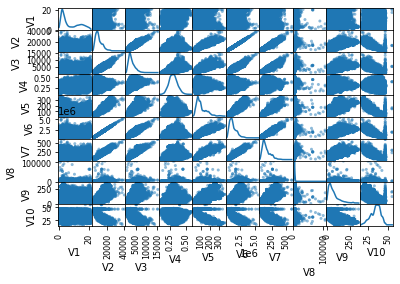

In [ ]:
pd.plotting.scatter_matrix(dataset.loc[:,"V1":"V10"],diagonal="kde")
plt.show()

# Normalizing Data

We can see that the data is not even. i.e the features differ by different scales of magnitudes. Thereby, data normalization is done

(Makes gradient descent converge more quickly)

In [ ]:
X = normalize(X)
Y = Y.reshape(-1, 1)
Y = normalize(Y)

# Splitting Dataset into Training Data and Test Data

This model will be trained using a seperate set of data and tested for prediction using a seperate set of data. This data seperation is done by the sklearn model selection library as follows :

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=0)

# Here only 0.1 of the dataset will be used as the test set and 0.9 of the dataset will be used as the training dataset
# Random State is defined to be zero in order to reproduce the same selection for test data and training data (The selection would be reproducable) 

# Initializing Parameters

[10] - The martix must include a row of ones to be interpreted as the intercept term

[11] - The parameteres needed to define gradient descent as declared

       Alpha : Learning Rate
       
       Theta : Initialized to a column matrix of values 01

In [ ]:
#Adding the intercept term
num = len(Y_train)
X_train = np.append(np.ones((num,1)),X_train,axis=1)

In [ ]:
alpha = 0.001
iterations = 350
theta = np.ones((10,1))


# Defining the Hypothesis as a Function

Function to calculate the h(x) when the theta and the X matrix is given

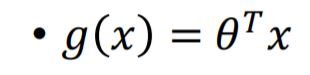

In [ ]:
def hypothesis(theta,X):
  return np.dot(X,theta)

# Cost Function

Function to calculate the cost for the given theta value against X and Y as follows :

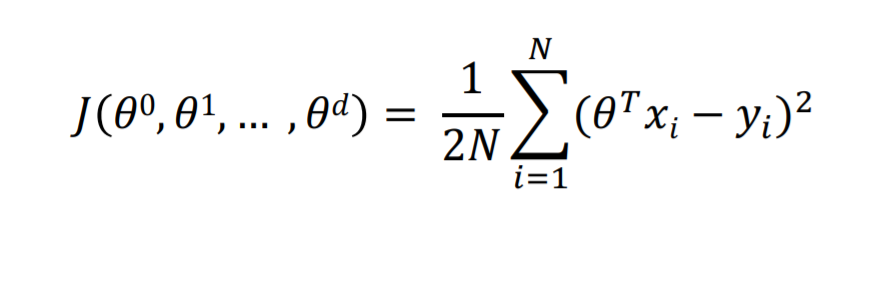

In [ ]:
def Cost(X,Y,theta): 
  error = Y - hypothesis(theta,X)
  J = 1/ (2*num)*np.sum((X.dot(theta)-Y)**2)
  return J

# Gradient Descent

Function to execute the gradient descent algorithm as follows :

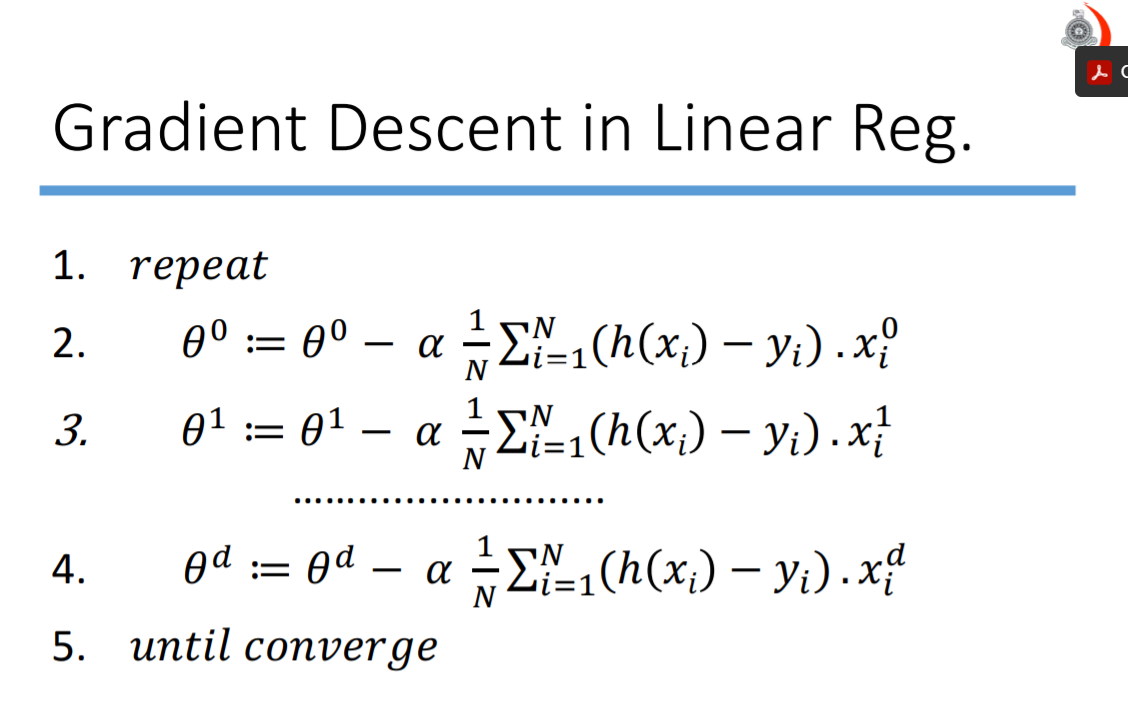

In [ ]:
def GradientDescent(X,Y,theta,alpha,iterations):
  num = len(Y)
  J_list = [] #To store the cost calculate for each theta value
  for i in range(iterations):
    theta = theta - (alpha * (1/num) * (X.T.dot(hypothesis(theta,X))))
    J_list.append(Cost(X,Y,theta))
  return theta,J_list

In [ ]:
#Calculating the Gradient Descent for the training set of X,Y and initialized alpha, theta and the number of iterations

theta,J_list = GradientDescent(X_train,Y_train,theta,alpha,iterations)

Theta is found using multivariate regression as shown above. Let's test this using the test dataset we split.

# Testing the Convergence of the Gradient Descent in Multivariate Regression

Text(0.5, 1.0, 'Cost Function using Gradient Descent')

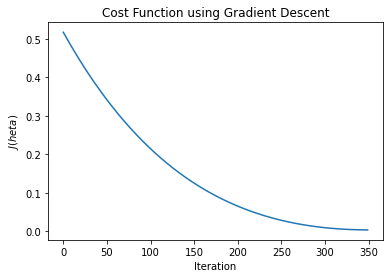

In [ ]:
plt.plot(J_list)
plt.xlabel("Iteration")
plt.ylabel("$J(\theta)$")
plt.title("Cost Function using Gradient Descent")

Here we can observe that the cost function has successfully converged and reached zero. Thereby, we can say that we have found an optimal value for theta with the minimum error.

# Predictions

In order to test the above theta value we can make predictions using the test dataset and compare the original values of Y as follows :

In [ ]:
#Function to predict Y values according to the calculated theta value 

def prediction(X_test):
  predictionData = np.dot(X_test,theta)
  return predictionData

In [ ]:
#Adding the intercept term to the dataset in order to apply the prediction function
numPrediction = len(X_test)
ones = np.ones((numPrediction,1))
X_test = np.hstack((ones,X_test))

#Applying the prediction function to the test dataset
prediction = prediction(X_test)

Results of the predicted Y values for the given X values of the test set are as follows :

In [ ]:
prediction

array([[0.99996491],
       [0.99851064],
       [0.99882046],
       ...,
       [0.99723539],
       [0.99846877],
       [0.9997944 ]])

The original Y values for the relevant X values of the test set are as follows :

In [ ]:
Y_test

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

Thereby, we can say that the multivariate linear regression model we created is predicting almost accurate values. 



---

